## Homework 1

This is due on Thurs, 6/1

1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

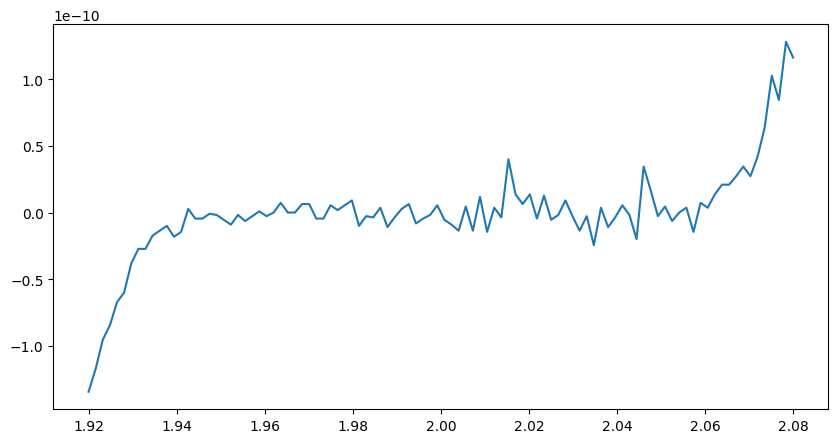

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(1.920,2.080,100)
y = x**9 - 18*x**8 + 144*x**7 - 672*x**6 + 2016*x**5 - 4032*x**4 + 5376*x**3 - 4608*x**2 + 2304*x - 512

figure = plt.figure(figsize = (10,5))

plt.plot(x,y)
plt.show()



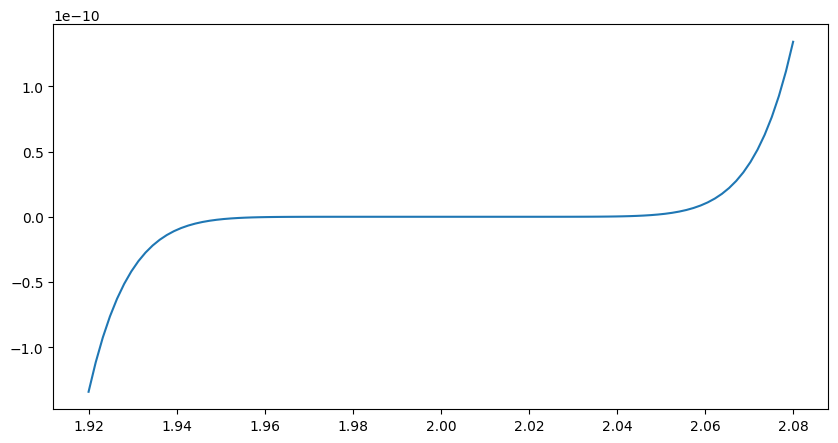

In [8]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(1.920,2.080,100)
y = (x-2)**9

figure = plt.figure(figsize = (10,5))

plt.plot(x,y)
plt.show()


In [ ]:
Why are the graphs different? Its because of floating point rounding/imprecision but more specifically its because in
the first one you are getting bigger numbers. Floating points and doubles are not equidistant on the number line. The closer you are to 
zero the more accurate floating point numbers typically are so since we stuck close to zero in the second one (1.92-2) and (2.08-2)

our error was much lower than it was when we created bigger numbers in the first one. To make it even worse addition
between large numbers creates big errors as well and we did that a bunch so the first graph is pretty innacurate

2\. How many different double-precision numbers are there?  Express your answer using powers of 2

In [ ]:
its 64 bits so 2^64

3\. Using the updated [Numbers Every Programmer Should Know](https://people.eecs.berkeley.edu/~rcs/research/interactive_latency.html), how much longer does a main memory reference take than an L1 cache look-up?  How much longer does a disk seek take than a main memory reference?

In [ ]:
Memory is 100 times slower than L1 cache disk seek is 20,000 times slower than memory

4\. From the Halide Video, what are 4 ways to traverse a 2d array?

In [ ]:
You could do it scanline order from left to right and then next line

You can transpose it so now you go straight down and then mover right when you are done with the column

You can do scan line again but instead of 1 at a time vectorize it into 4 at a time

You can do it parrallelized in y dimension and do vectorized as well

Or you can split x and y into tiles (Cinebench does this combined with parrallelization)



5\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

  a. <img src="images/Halide1.gif" alt="Halide" style="width: 70%"/>
  
  b. <img src="images/Halide2.gif" alt="Halide" style="width: 70%"/>
  
  c. <img src="images/Halide3.gif" alt="Halide" style="width: 70%"/>

In [ ]:
For the first one its pretty bad because of locality. reading in the entire thing and then computing blurred in y means
almost all of the data will get evicted from cache.

For the 2nd one we have great locality because we process quickly but we are recomputing data we already processed.

For the 3rd one its locality is good and there isnt redundant operations performed but the problem is when you try to parrallelize it 
you cant do it as well because it is serially dependent on the previous two blocks above it being done

6\. Prove that if $A = Q B Q^T$ for some orthnogonal matrix $Q$, the $A$ and $B$ have the same singular values.

In [ ]:
Any matrix can be seen geometrically as a linear transformation that can be applied on vectors or another matrix. 
Also any transpose of an orthognal matrix is also orthogonal and more importantly its own inverse by definition. What this means 
is that matrix B is simply being rotated twice and is then equivalent to A. Since it is equivalent after two rotations it must
have the same singular values because singular values are simply how much you stretch or squish the singular vectors just like how
an eigen value is a scalar applied to an eigenvector.


Now to prove this 
A = QBQ^t so  AA^t = (QBQ^t)^t (QBQ^t) = Q^tB^tQQ^tBQ = Q^t(B^tIB^t)Q so now we have Q^t(BB^t)Q = AA^t since this proves that A and B
                                                ^QQ^t= identity matrix for an orthogonal matrix
are similar it also proves they have the same eigenvalues and thus the same singular values because the nonnegative 
square root of the eigenvalues of AA^t is the definition of the singular values of A


7\. What is the *stochastic* part of *stochastic gradient descent*?

In [ ]:
Stochastic in this context means you are taking small random samples to lower the amount you have to process 
while performing the gradient descent. Instead of calculating the gradient of the entire data set you just
take a small random sample of it because it is usually close enough and much much faster.